In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ReferenceElement import *
import os
import imageio
from dg_wave_with_coord_trans_new import *
%matplotlib inline

In [36]:
def x_p(t):
    return 0.5*np.sin(t)
def x_p_dot(t):
    return 0.5*np.cos(t)
def x_p_dot_dot(t):
    return -0.5*np.cos(t)
def analytical_left(x,x_p,t):
    theta_minus = np.heaviside(x_p(t)-x,1)
    return theta_minus*np.cos(x+t)
def analytical_right(x,x_p,t):
    theta_plus = np.heaviside(x- x_p(t),1)
    return theta_plus*np.sin(x-t)
def analytical_u(x,x_p,t):
    return np.cos(x -x_p(t)-t)+1/2*np.sin(x-x_p(t)+t)


99


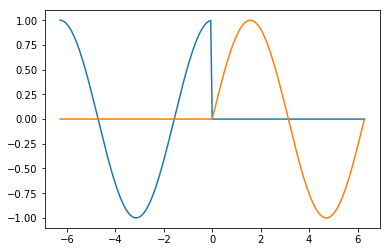

In [28]:
x = np.linspace(-2*np.pi,2*np.pi, 201)
t = 0
u_left = analytical_left(x,x_p,t)
u_right= analytical_right(x,x_p,t)
plt.plot(x, u_left)
plt.plot(x, u_right)
i = 0
while np.heaviside(x_p(t)-x,1)[i] > 0:
    i += 1
print(i-1)


In [29]:
t_target = 4*np.pi
t_int = np.linspace(t,t_target,101)
# direc = "analytical"
# if os.path.isdir(direc):
#     print('Directory'+direc+'already exists')
# else:
#     os.makedirs(direc)
# images = []

In [42]:
jump_of_t = []
for t in t_int:
   
    i = 0
    theta_minus = np.heaviside(x_p(t)-x,1)
    while theta_minus[i] > 0:
        i += 1
    j = 0
    theta_plus = np.heaviside(x-x_p(t),1)
    while theta_plus[j] == 0:
        j +=1
    u_left = analytical_left(x,x_p,t)
    u_right= analytical_right(x,x_p,t)
    jump = u_right[j]- u_left[i-1]
    jump_of_t.append(jump)
#     plt.figure(figsize=(11, 7), dpi=100)
#     plt.plot(x[:i], u_left[:i])
#     plt.plot(x[j:], u_right[j:])
    
#     plt.title(str(np.round(t,3)))
#     name = direc+"/figure"+str(np.round(t,3))+'.png'
#     plt.savefig(name)
#     images.append(imageio.imread(name))
#     plt.close()
# gifName = direc+'/movie.gif'
# imageio.mimsave(gifName,images)

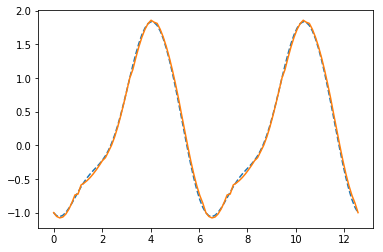

In [35]:
def analytical_jump(x_p,t):
    return np.sin(x_p(t)-t) - np.cos(x_p(t)+t)
plt.plot(t_int, analytical_jump(x_p,t_int),ls = '--')
plt.plot(t_int,jump_of_t)

In [40]:
t = 0
t_target = 4*np.pi
t_int = np.linspace(t,t_target,101)
new_u = analytical_u(x,x_p,t)

In [41]:
direc = "analytical_periodic"
if os.path.isdir(direc):
    print('Directory'+direc+'already exists')
else:
    os.makedirs(direc)
images = []
for t in t_int:
    u_ana = analytical_u(x,x_p,t)
    plt.figure(figsize=(11, 7), dpi=100)
    plt.plot(x, u_ana, label = 'analytical u \n cos(x-xp+t) + 0.5sin(x-xp-t)')
    plt.title(str(np.round(t,3)))
    plt.legend()
    plt.ylim(-2,2)
    name = direc+"/figure"+str(np.round(t,3))+'.png'
    plt.savefig(name)
    images.append(imageio.imread(name))
    plt.close()
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)